# 데이터 클린징의 이해

- 데이터 분석에서, 데이터의 특정 편항(Bias) 없이 명확하고 깨끗한 데이터를 확보하는 작업을 데이터 클린징(Data Cleansing)이라고 합니다.

# 결측 데이터
- 데이터 클린징 작업으로 데이터 누락값 즉, 결측값(Missing data)이 있는지를 자세히 검토합니다.
- 결측치 처리 방법
> - 결측치 확인
> - 결측치 대체/제거
> - 결측치 반영 확인

## 결측 데이터 확인
- isnull() : 결측 데이터이면 True값을 반환하고, 유효한 데이터가 존재하면 False를 반환
- notnull() : 유효한 데이터가 존재하면 True를 반환하고, 누락 데이터면 False를 반환

In [3]:
import pandas as pd
# 파일경로를 찾고 변수 file_path에 저장
file_path = 'C:/Users/BurgerC/파이썬으로 경험하는 빅데이터 머신러닝/missing_sample.csv'

# read csv() 함수로 데이터프레임 변환
df = pd.read_csv(file_path)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# 결측데이터 확인
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [5]:
df.notnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
763,True,True,True,True,True,True,True,True,True
764,True,True,True,True,True,True,True,True,True
765,True,True,True,True,True,True,True,True,True
766,True,True,True,True,True,True,True,True,True


## 결측치 개수 확인
- 칼럼별 결측값 개수 구하기 : df.isnull().sum()
- 행(row) 단위로 결측값 개수 구하기 : df.isnull().sum(1)
- 행(row) 단위로 실제값 개수 구하기 : df.notnull().sum(1)

In [6]:
# 결측값 개수
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [12]:
# 행단위 결측값 개수
df.isnull().sum(1)

0      0
1      0
2      0
3      0
4      0
      ..
763    0
764    0
765    0
766    0
767    0
Length: 768, dtype: int64

In [13]:
# 행단위 실제값 개수
df.notnull().sum(1)

0      9
1      9
2      9
3      9
4      9
      ..
763    9
764    9
765    9
766    9
767    9
Length: 768, dtype: int64

## 결측치 제거
- 행 삭제 : df.dropna(axis=0)
- 열 삭제 : df.dropna(axis=1)
- df.dropna()

In [15]:
# 결측치가 있는 전체 행 제거
df_drop_allrow = df.dropna(axis=0)
df_drop_allrow

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [16]:
# 결측치가 있는 전체 열 제거
df_drop_allcolumn = df.dropna(axis = 1)
df_drop_allcolumn

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [17]:
# 특정 행 또는 열 결측치 제거, 당뇨여부 컬럼 제거(비교확인)
df['Outcome'].dropna()

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [19]:
# 하단 df.dropna(axis=0)와 동일
df[['Pregnancies', 'BloodPressure', 'BMI']].dropna()
df[['Pregnancies', 'BloodPressure', 'BMI']].dropna(axis=0)

,Pregnancies,BloodPressure,BMI
0,6,72,33.6
1,1,66,26.6
2,8,64,23.3
3,1,66,28.1
4,0,40,43.1
...,...,...,...
763,10,76,32.9
764,2,70,36.8
765,5,72,26.2
766,1,60,30.1


In [20]:
df[['Pregnancies', 'BloodPressure', 'BMI']].dropna(axis=1)

,Pregnancies,BloodPressure,BMI
0,6,72,33.6
1,1,66,26.6
2,8,64,23.3
3,1,66,28.1
4,0,40,43.1
...,...,...,...
763,10,76,32.9
764,2,70,36.8
765,5,72,26.2
766,1,60,30.1


## 결측 데이터 대체
- 결측값을 특정 값으로 채우기 : df.fillna(0)
- 결측값을 특정 문자열로 채우기 : df.fillna(' ')
- 결측값을 변수별 평균으로 대체 : df.fillna(df.mean())

In [21]:
# 결측값을 특정 값(0)으로 대체
df_1 = df.fillna(0)
df_1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [22]:
# 특정 컬럼 결측값을 특정 값(0)으로 대체
df_2 = df.Pregnancies.fillna(0)
df_2

0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: Pregnancies, Length: 768, dtype: int64

In [23]:
# 결측값을 문자열('missing')로 대체
df_3 = df.fillna('missing')
df_3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [24]:
# 각 칼럼의 평균을 구해서 대응하는 칼럼의 결측값을 대체하는 방법으로 가장 많이 사용된다.
df_4 = df.fillna(df.mean())
df_4

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [25]:
# 특정항목 평균 구하기(임신횟수평균)
df_5 = df.mean()['Pregnancies']
df_5

3.8450520833333335

In [27]:
# 특정항목 평균으로 대체
df_6 = df.fillna(df.mean()['Pregnancies'])
df_6

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [28]:
## 특정항목 평균으로 대체
df_7 = df.Pregnancies.fillna(df.mean()['Pregnancies'])
df_7

0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: Pregnancies, Length: 768, dtype: int64

 # 이상데이터
 - 정상에서 벗어난 데이터를 이상치(Outlier)라고 합니다.

##  이상치 처리
 > - 이상치 확인
 > - 결측치 처리 제거/대체
 > - 이상치 처리 확인

In [29]:
import pandas as pd
# 파일경로를 찾고 변수 file_path에 저장
file_path = 'C:/Users/BurgerC/파이썬으로 경험하는 빅데이터 머신러닝/missing_sample.csv'

# read csv()함수로 데이터프레임 변환
df = pd.read_csv(file_path)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [30]:
# 이상값이 있는 1번째 행 제거
df1 = df.drop(0, 0)
df1

C:\Users\BurgerC\AppData\Local\Temp\ipykernel_828\3404732827.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1 = df.drop(0, 0)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 이상치 처리 방법
- 단순 삭제
- 다른 값으로 대체
- 변수화
- 리샘플링
- 케이스분리 분석

## 이상치 시각화
- 중앙값은 중앙값 50%의 위치한 데이터입니다. 중앙값은 짝수일 경우 2개가 될 수도 있고, 그것의 평균이 중앙값이 될 수도 있습니다. 홀수일 경우, 중앙값은 1개가 됩니다.
- 박스(Box)는 25%(Q1)~75%(Q3)까지 값들을 박스로 둘러 쌓게 됩니다.
- 수염(whiskers)은 박수의 각 모서리(Q1, Q3)로부터 IQR의 1.5배 내에 있는 가장 멀리 떨어진 데이터 점까지 이어져 있는 것이 수염입니다.
- 이상치는 수염보다 바깥쪽에 데이터가 존재하는 데이터로 이 것을 이상치로 분류하면 됩니다.

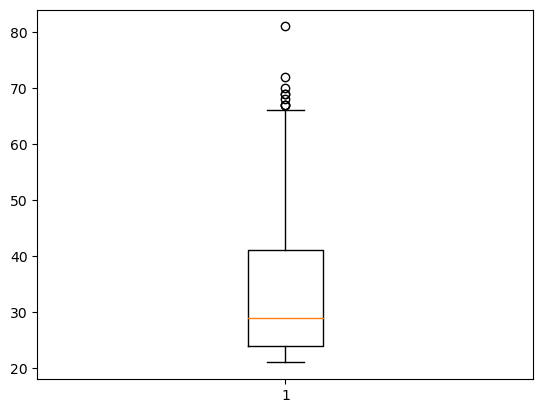

In [31]:
# 고급시각화 박스플롯 참조
# 나이 이상치 시각화
import matplotlib as mpl  # 맷플롯맆
import matplotlib.pylab as plt  # 맷플롯립
plt.boxplot(df['Age'])
plt.show()

# 중복 데이터
- 판다스에서 중복 데이터를 확인할 때 사용하는 방법으로 duplicated()함수가 있습니다.
- 중복값을 처리할 때 drop_duplicates()을 사용합니다.
<br>
<br>
- 중복데이터 처리 단계
> - 중복 데이터 확인 중복이 있으면 무엇을 남길지 확인
> - 중복값 처리(유일한 1개 키만 남기고 나머지 중복 제거) : DataFrame.drop_duplicates()
> - 중복처리 결과 확인

## 중복 데이터 확인
- 중복 데이터가 있는지 확인하기 : df.duplicated()

In [32]:
import pandas as pd
# 파일경로를 찾고 변수 file_path에 저장
file_path = 'C:/Users/BurgerC/파이썬으로 경험하는 빅데이터 머신러닝/missing_sample.csv'

# read_csv()함수로 데이터프레임 변환
df = pd.read_csv(file_path)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [33]:
# duplicated() 메소드로 중복 데이터 찾기
# dataFrame.duplicated()는 True, False 의 boolean 형태의 Series 반호나
df.duplicated(['Pregnancies'])

0      False
1      False
2      False
3       True
4      False
       ...  
763     True
764     True
765     True
766     True
767     True
Length: 768, dtype: bool

In [34]:
df.duplicated(['Pregnancies', 'BloodPressure'])

0      False
1      False
2      False
3       True
4      False
       ...  
763     True
764     True
765     True
766     True
767     True
Length: 768, dtype: bool

## 중복 시작과 끝 확인
- Keep = 'first', 'last', False

In [35]:
# 중복이 있으면 처음이나 끝에 무엇을 남길지 확인
# keep='first'가 default이며, 중복값이 있으면 첫 번째 값을 duplicated여부를 False로 반환 나머지 중복값에 대해서는 True를 반환
df.duplicated(['Pregnancies'], keep='first') #기본값

0      False
1      False
2      False
3       True
4      False
       ...  
763     True
764     True
765     True
766     True
767     True
Length: 768, dtype: bool

In [36]:
# keep='last'는 중복값이 있으면 첫 번째 값을 duplicated 여부를 True로 반환 나머지 중복값에 대해서는 False를 반환
df.duplicated(['Pregnancies'], keep='last')

0       True
1       True
2       True
3       True
4       True
       ...  
763    False
764    False
765    False
766     True
767    False
Length: 768, dtype: bool

In [37]:
# keep=False는 처음이나 끝깞인지 여부는 고려를 안하고 중복이면 무조건 True를 반환
df.duplicated(['Pregnancies'], keep=False)

0      True
1      True
2      True
3      True
4      True
       ... 
763    True
764    True
765    True
766    True
767    True
Length: 768, dtype: bool

## 중복 제거
- 데이터프레임.drop_duplicates()

In [38]:
# drop_duplicates()는 중복값을 keep='first', 'last', False argument에 따라 유일한 1개의 key값만 남기고 나머지는 중복 제거

df.drop_duplicates(['Pregnancies'], keep='first')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
10,4,110,92,0,0,37.6,0.191,30,0
15,7,100,0,0,0,30.0,0.484,32,1


In [39]:
df.drop_duplicates(['Pregnancies'], keep='last')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
455,14,175,62,30,0,33.6,0.212,38,1
740,11,120,80,37,150,42.3,0.785,48,1
744,13,153,88,37,140,40.6,1.174,39,0
745,12,100,84,33,105,30.0,0.488,46,0
750,4,136,70,0,0,31.2,1.182,22,1
752,3,108,62,24,0,26.0,0.223,25,0
754,8,154,78,32,0,32.4,0.443,45,1
756,7,137,90,41,0,32.0,0.391,39,0


In [40]:
df.drop_duplicates(['Pregnancies'], keep=False)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
